In [1]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')
import pandas_profiling as pp
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier
from mlxtend.classifier import StackingCVClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [6]:
df = pd.read_csv("/kaggle/input/heart-failure-prediction/heart.csv")

In [7]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.00,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.00,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.00,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.50,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.00,Up,0


In [8]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


In [9]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There are No NAN values

In [ ]:
profile = pp.ProfileReport(df)
profile.to_file("output.html")

In [ ]:
df.info()

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = df.copy(deep = True)

df1['Sex'] = le.fit_transform(df1['Sex'])
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])
df1['ExerciseAngina'] = le.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope'] = le.fit_transform(df1['ST_Slope'])

In [11]:
df1.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.00,2,0
1,49,0,2,160,180,0,1,156,0,1.00,1,1
2,37,1,1,130,283,0,2,98,0,0.00,2,0
3,48,0,0,138,214,0,1,108,1,1.50,1,1
4,54,1,2,150,195,0,1,122,0,0.00,2,0
5,39,1,2,120,339,0,1,170,0,0.00,2,0
6,45,0,1,130,237,0,1,170,0,0.00,2,0
7,54,1,1,110,208,0,1,142,0,0.00,2,0
8,37,1,0,140,207,0,1,130,1,1.50,1,1
9,48,0,1,120,284,0,1,120,0,0.00,2,0


In [12]:
categorical_features = ['Sex','ChestPainType','RestingECG','ExerciseAngina','FastingBS','ST_Slope','HeartDisease']
numerical_features = ['Age','RestingBP','MaxHR','Cholesterol','Oldpeak']

Data Scaling :

In [13]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1['Oldpeak'] = mms.fit_transform(df1[['Oldpeak']]) 
df1['Age'] = ss.fit_transform(df1[['Age']])
df1['RestingBP'] = ss.fit_transform(df1[['RestingBP']])
df1['Cholesterol'] = ss.fit_transform(df1[['Cholesterol']])
df1['MaxHR'] = ss.fit_transform(df1[['MaxHR']])
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.43,1,1,0.41,0.83,0,1,1.38,0,0.30,2,0
1,-0.48,0,2,1.49,-0.17,0,1,0.75,0,0.41,1,1
2,-1.75,1,1,-0.13,0.77,0,2,-1.53,0,0.30,2,0
3,-0.58,0,0,0.30,0.14,0,1,-1.13,1,0.47,1,1
4,0.05,1,2,0.95,-0.03,0,1,-0.58,0,0.30,2,0


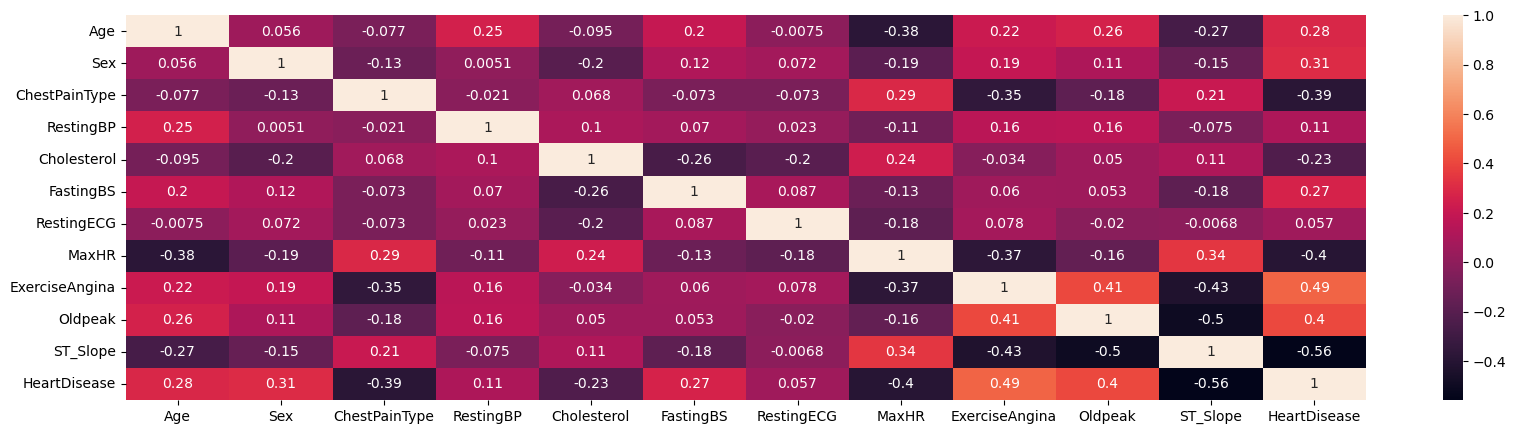

In [14]:
plt.figure(figsize = (20,5))
sns.heatmap(df1.corr(),annot = True);

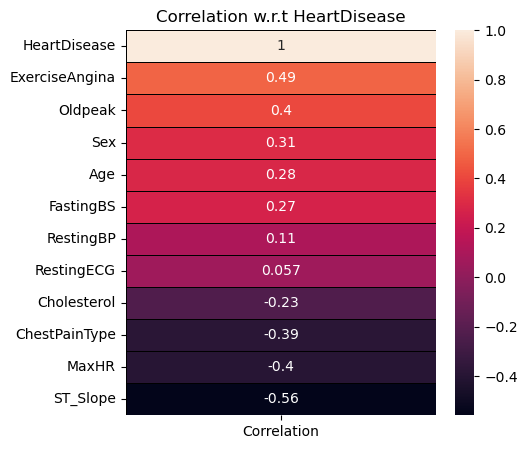

In [15]:
corr = df1.corrwith(df1['HeartDisease']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlation']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,linewidths = 0.6,linecolor = 'black');
plt.title('Correlation w.r.t HeartDisease');

we can drop Resting ECG 

# **Feature Selection for Categorical Features**

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

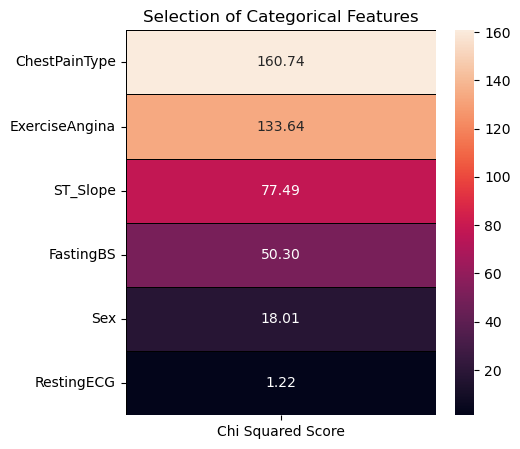

In [17]:
features = df1.loc[:,categorical_features[:-1]]
target = df1['HeartDisease']

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,linewidths = 0.6,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

We can drop RestingECG as it has a very low chi2 score

# **Feature selection for numerical Features**

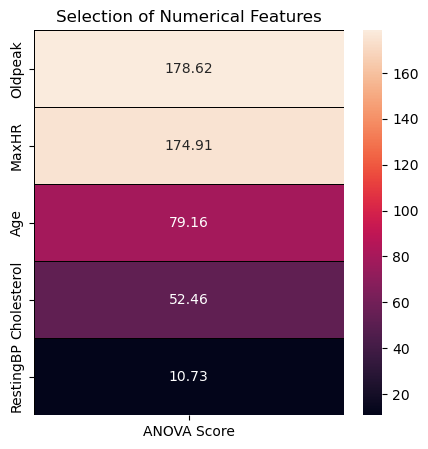

In [18]:
from sklearn.feature_selection import f_classif

features = df1.loc[:,numerical_features]
target = df1['HeartDisease']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,linewidths = 0.6,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

RestingBP can be dropped

In [19]:
features = df1[df1.columns.drop(['HeartDisease','RestingBP','RestingECG'])].values
target = df1['HeartDisease'].values
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 42)

In [20]:
x_train

array([[-1.22099397,  1.        ,  2.        , ...,  0.        ,
         0.38636364,  0.        ],
       [-1.85743145,  1.        ,  2.        , ...,  0.        ,
         0.29545455,  2.        ],
       [ 0.2640268 ,  1.        ,  0.        , ...,  1.        ,
         0.40909091,  1.        ],
       ...,
       [ 0.68831845,  1.        ,  0.        , ...,  1.        ,
         0.45454545,  2.        ],
       [ 0.68831845,  1.        ,  0.        , ...,  1.        ,
         0.29545455,  2.        ],
       [-1.4331398 ,  0.        ,  0.        , ...,  0.        ,
         0.52272727,  1.        ]])

### 1. Support Vector Machine

In [ ]:
svm = SVC()

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': ['auto','scale'],
              'kernel': ['linear','poly','rbf','sigmoid']
             }


In [ ]:
gs_svm = GridSearchCV(  estimator = svm,
                        param_grid = param_grid, 
                        cv = 5,
                        scoring = "roc_auc",
                        refit = True,
                        verbose = 1,
                        n_jobs = -1)

In [ ]:
gs_svm.fit(x_train,y_train)

In [ ]:
gs_svm.best_params_

In [ ]:
gs_svm.best_score_

{'C': 10, 'gamma': 'auto', 'kernel': 'linear'}

### 2. KNN

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [ ]:
gs_knn = GridSearchCV(  estimator = knn,
                        param_grid = knn_params, 
                        cv = 5,
                        scoring = "roc_auc",
                        refit = True,
                        verbose = 1,
                        n_jobs = -1)

In [ ]:
gs_knn.fit(x_train,y_train)

In [ ]:
gs_knn.best_params_

In [ ]:
gs_knn.best_score_

{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}

### 3. MLP

In [12]:
mlp_params = {
     'solver': ['adam'],
     'learning_rate_init': [0.0001,0.01,0.1],
     'max_iter': [300],
     'hidden_layer_sizes': [(50,30,20,30,10), (400, 300, 200, 100), (400, 300, 200, 100, 50), (50, 40, 30, 20, 10), (20, 15, 10, 5)],
     'activation': ['logistic', 'tanh', 'relu'],
     'alpha': [0.0001, 0.001, 0.005],
     'early_stopping': [True, False]
     }

In [13]:
gs_mlp = GridSearchCV(  estimator = MLPClassifier(),
                        param_grid = mlp_params, 
                        cv = 5,
                        scoring = "roc_auc",
                        refit = True,
                        verbose = 1,
                        n_jobs = -1)

In [14]:
gs_mlp.fit(x_train,y_train)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multi

GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'alpha': [0.0001, 0.001, 0.005],
                         'early_stopping': [True, False],
                         'hidden_layer_sizes': [(50, 30, 20, 30, 10),
                                                (400, 300, 200, 100),
                                                (400, 300, 200, 100, 50),
                                                (50, 40, 30, 20, 10),
                                                (20, 15, 10, 5)],
                         'learning_rate_init': [0.0001, 0.01, 0.1],
                         'max_iter': [300], 'solver': ['adam']},
             scoring='roc_auc', verbose=1)

In [18]:
gs_mlp.best_params_

{'activation': 'relu',
 'alpha': 0.001,
 'early_stopping': False,
 'hidden_layer_sizes': (50, 30, 20, 30, 10),
 'learning_rate_init': 0.0001,
 'max_iter': 300,
 'solver': 'adam'}

In [15]:
gs_mlp.best_estimator_

MLPClassifier(alpha=0.001, hidden_layer_sizes=(50, 30, 20, 30, 10),
              learning_rate_init=0.0001, max_iter=300)

In [17]:
mlp_proba = gs_mlp.predict_proba(x_test)
mlp_score = roc_auc_score(y_test, mlp_proba[:, 1])
print(f"ROC AUC: {mlp_score:.4f}")

ROC AUC: 0.9330


In [16]:
gs_mlp.best_score_

0.9175728819426995

{'activation': 'tanh',
 'alpha': 0.0001,
 'early_stopping': True,
 'hidden_layer_sizes': (400, 400, 400, 400, 400),
 'learning_rate_init': 0.0001,
 'max_iter': 300,
 'solver': 'adam'}

### 4. Random Forest

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc_params = { 
    'n_estimators': [100, 150, 300, 500 ],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
gs_rfc = GridSearchCV(  estimator = rfc,
                        param_grid = rfc_params, 
                        cv = 5,
                        scoring = "roc_auc",
                        refit = True,
                        verbose = 1,
                        n_jobs = -1)

In [ ]:
gs_rfc.fit(x_train,y_train)

In [ ]:
gs_rfc.best_params_

In [ ]:
gs_rfc.best_score_

In [ ]:
rfc_proba = gs_rfc.predict_proba(x_test)
rfc_score = roc_auc_score(y_test, rfc_proba[:, 1])
print(f"ROC AUC: {rfc_score:.4f}")

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 150}

### 5. XGBoost

In [ ]:
xgb = XGBClassifier(learning_rate = 0.02, objective='binary:logistic',nthread=4)

In [ ]:
xgb_params = {
        'n_estimators' : [100,150,250],
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2],
        'max_depth': [3, 4, 5],
        'subsample': [0.6, 0.8, 1.0]
        }

In [ ]:
gs_xgb = GridSearchCV(  estimator = xgb,
                        param_grid = xgb_params, 
                        cv = 5,
                        scoring = "roc_auc",
                        refit = True,
                        verbose = 1
                     )

In [ ]:
gs_xgb.fit(x_train,y_train)

In [ ]:
gs_xgb.best_params_

In [ ]:
gs_xgb.best_score_

In [ ]:
y_proba = gs_xgb.predict_proba(x_test)
#print(classification_report(y_test,y_pred))

{'gamma': 1.5,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 250,
 'subsample': 0.8}
 learning_rate = 0.02

In [ ]:
xgb_score = roc_auc_score(y_test, y_proba[:, 1])
print(f"ROC AUC: {xgb_score:.4f}")

### 6. CatBoost

In [ ]:
cbc = cb.CatBoostClassifier(loss_function='Logloss')

In [ ]:
cbc_params = {'learning_rate': [0.03,0.05,0.1],
        'n_estimators' : [50,150,300,500],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5,7,9]}

In [ ]:
gs_cbc = GridSearchCV(  estimator = cbc,
                        param_grid = cbc_params, 
                        cv = 5,
                        scoring = "roc_auc",
                        refit = True,
                        verbose = 1
                     )

In [ ]:
gs_cbc.fit(x_train,y_train)

In [ ]:
gs_cbc.best_score_

In [ ]:
gs_cbc.best_params_

In [ ]:
y_probacbc = gs_cbc.predict_proba(x_test)

In [ ]:
cbc_score = roc_auc_score(y_test, y_probacbc[:, 1])
print(f"ROC AUC: {cbc_score:.4f}")

{'depth': 6, 'l2_leaf_reg': 1, 'learning_rate': 0.03, 'n_estimators': 300}

## 7. AdaBoost

In [16]:
ada = AdaBoostClassifier(random_state = 42)

In [24]:
ada_params = {'learning_rate': [0.03,0.05,0.07,0.1],
        'n_estimators' : [100,200,300,400,500],
        'algorithm': ['SAMME', 'SAMME.R']
             }

In [25]:
gs_ada = GridSearchCV(  estimator = ada,
                        param_grid = ada_params, 
                        cv = 5,
                        scoring = "roc_auc",
                        refit = True,
                        verbose = 1
                     )

In [26]:
gs_ada.fit(x_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.03, 0.05, 0.07, 0.1],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='roc_auc', verbose=1)

In [27]:
y_proba_ada = gs_ada.predict_proba(x_test)

In [28]:
ada_score = roc_auc_score(y_test, y_proba_ada[:, 1])
print(f"ROC AUC: {ada_score:.4f}")

ROC AUC: 0.9268


In [29]:
gs_ada.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 0.03, 'n_estimators': 300}

{'algorithm': 'SAMME.R', 'learning_rate': 0.03, 'n_estimators': 300}

In [30]:
gs_ada.best_score_

0.924414243317643

## 8. Decision tree 

In [32]:
dt = DecisionTreeClassifier(random_state=42)

In [33]:
dt_params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [34]:
gs_dt = GridSearchCV(  estimator = dt,
                        param_grid = dt_params, 
                        cv = 5,
                        scoring = "roc_auc",
                        refit = True,
                        verbose = 1
                     )

In [35]:
gs_dt.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='roc_auc', verbose=1)

In [36]:
y_proba_dt = gs_dt.predict_proba(x_test)

In [37]:
dt_score = roc_auc_score(y_test, y_proba_dt[:, 1])
print(f"ROC AUC: {dt_score:.4f}")

ROC AUC: 0.9261


In [38]:
gs_dt.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10}

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10}

In [39]:
gs_dt.best_score_

0.8969350079010112

In [40]:
gs_dt.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10,
                       random_state=42)

## 9. Naive Bayes

In [43]:
nb = GaussianNB()

In [46]:
nb_params = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_nb = GridSearchCV(estimator=nb, 
                     param_grid=nb_params, 
                     cv=5,
                     verbose=1,
                     refit = True,
                     scoring='roc_auc')

In [47]:
gs_nb.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='roc_auc', verbose=1)

In [48]:
gs_nb.best_score_

0.9173677697371726

In [49]:
gs_nb.best_params_

{'var_smoothing': 0.0015199110829529332}

{'var_smoothing': 0.0015199110829529332}

## 10. Logistic regression

In [12]:
lr = LogisticRegression()

In [24]:
lr_params = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [1,2,3,4,5,6,7,8,9,10]
    }
]

In [25]:
gs_lr = GridSearchCV(estimator=lr, 
                     param_grid=lr_params, 
                     cv=5,
                     verbose=1,
                     refit = True,
                     scoring='roc_auc')

In [26]:
gs_lr.fit(x_train,y_train)

Fitting 5 folds for each of 4000 candidates, totalling 20000 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             scoring='roc_auc', verbose=1)

In [27]:
gs_lr.best_score_

0.9195126150951193

In [28]:
gs_lr.best_params_

{'C': 0.08858667904100823, 'max_iter': 7, 'penalty': 'none', 'solver': 'sag'}

In [29]:
y_proba_lr = gs_lr.predict_proba(x_test)

In [34]:
lr_score = roc_auc_score(y_test, y_proba_lr[:, 1])
print(f"ROC AUC: {lr_score:.4f}")

ROC AUC: 0.9061


In [35]:
gs_lr.best_estimator_

LogisticRegression(C=0.08858667904100823, max_iter=7, penalty='none',
                   solver='sag')

LogisticRegression(C=0.08858667904100823, max_iter=7, penalty='none',
                   solver='sag')

## 11.LightGBM

In [43]:
lgbm = LGBMClassifier()

In [61]:
lgbm_params = {
    'num_leaves': [5,10,20,30,50,100],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [30, 50, 100, 300, 400],
    'lambda_l1': [0, 1, 1.5],
    'lambda_l2': [0, 1],
    }

In [62]:
gs_lgbm = GridSearchCV(estimator = lgbm, 
                     param_grid = lgbm_params, 
                     cv=5,
                     verbose = 0,
                     refit = True,
                     scoring='roc_auc')

In [63]:
gs_lgbm.fit(x_train,y_train,verbose = False)

[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] lambda_l1 is set

GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'lambda_l1': [0, 1, 1.5], 'lambda_l2': [0, 1],
                         'min_data_in_leaf': [30, 50, 100, 300, 400],
                         'num_leaves': [5, 10, 20, 30, 50, 100],
                         'reg_alpha': [0.1, 0.5]},
             scoring='roc_auc')

In [64]:
y_proba_lgbm = gs_lgbm.predict_proba(x_test)
lgbm_score = roc_auc_score(y_test, y_proba_lgbm[:, 1])
print(f"ROC AUC: {lgbm_score:.4f}")

ROC AUC: 0.9385


In [65]:
gs_lgbm.best_estimator_

LGBMClassifier(lambda_l1=1.5, lambda_l2=1, min_data_in_leaf=50, num_leaves=5,
               reg_alpha=0.1)

In [68]:
gs_lgbm.best_params_

{'lambda_l1': 1.5,
 'lambda_l2': 1,
 'min_data_in_leaf': 50,
 'num_leaves': 5,
 'reg_alpha': 0.1}

## -----------------------------------------------------------------------------------------------------------------

## Stacking 

In [14]:
def get_stacking():

  level0 = list()
  level0.append(('lr', LogisticRegression(C=0.08858667904100823, max_iter=7,solver='saga')))       
  level0.append(('knn', KNeighborsClassifier(metric = 'manhattan', n_neighbors = 15, weights = 'distance')))
  level0.append(('dt', DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10,random_state=42)))
  level0.append(('svc', SVC(C = 10, gamma = 'auto', kernel = 'linear')))
  level0.append(('ada', AdaBoostClassifier(n_estimators = 300, learning_rate = 0.03, algorithm = 'SAMME.R')))
  level0.append(('cat', CatBoostClassifier(n_estimators = 300, depth = 6, l2_leaf_reg = 1, learning_rate = 0.03, verbose = False)))
  level0.append(('mlp', MLPClassifier(activation = 'relu', alpha = 0.0001, early_stopping = False,
                                     hidden_layer_sizes = (50, 30, 20, 30, 10),
                                     learning_rate_init = 0.0001,
                                     max_iter = 300,
                                     solver = 'adam')))
  level0.append(('xgb', XGBClassifier(n_estimators = 250, subsample = 0.8, min_child_weight = 1, max_depth = 3, gamma = 1.5, learning_rate = 0.02)))
  level0.append(('nb', GaussianNB(var_smoothing = 0.0015199110829529332)))
  level0.append(('rfc', RandomForestClassifier(n_estimators = 150, max_features = 'auto', max_depth = 6, criterion = 'entropy')))
               
 # define meta learner model
               
  level1 = XGBClassifier()
               
 # define the stacking ensemble
               
  model = StackingClassifier(estimators=level0, final_estimator=level1, passthrough = True, stack_method = 'auto')
  return model

{'activation': 'relu',
 'alpha': 0.001,
 'early_stopping': False,
 'hidden_layer_sizes': (50, 30, 20, 30, 10),
 'learning_rate_init': 0.0001,
 'max_iter': 300,
 'solver': 'adam'}

In [17]:
def get_models():
 models = dict()
 models['lr'] = LogisticRegression(C=0.08858667904100823, max_iter=7,solver='saga')
 models['knn'] = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 15, weights = 'distance')
 models['dt'] = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10,random_state=42)
 models['svm'] = SVC(C = 10, gamma = 'auto', kernel = 'linear')
 models['bayes'] = GaussianNB(var_smoothing = 0.0015199110829529332)
 models['ada'] = AdaBoostClassifier(n_estimators = 300, learning_rate = 0.03, algorithm = 'SAMME.R')
 models['cat'] = CatBoostClassifier(n_estimators = 300, depth = 6, l2_leaf_reg = 1, learning_rate = 0.03, verbose = False)
 models['mlp'] = MLPClassifier(activation = 'relu', alpha = 0.0001, early_stopping = False,
                                     hidden_layer_sizes = (50, 30, 20, 30, 10),
                                     learning_rate_init = 0.0001,
                                     max_iter = 300,
                                     solver = 'adam')
 models['xgb'] = XGBClassifier(n_estimators = 250, subsample = 0.8, min_child_weight = 1, max_depth = 3, gamma = 1.5, learning_rate = 0.02)
 models['rfc'] = RandomForestClassifier(n_estimators = 150, max_features = 'auto', max_depth = 6, criterion = 'entropy')
 models['stacking'] = get_stacking()
 return models

In [18]:
def evaluate_model(model, X, y):
 cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 3, random_state=0)
 scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
 return scores

In [19]:
#Get the models
models = get_models()

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

 ROC_AUC [lr]: 0.911 +/- 0.025
 ROC_AUC [knn]: 0.923 +/- 0.023
 ROC_AUC [dt]: 0.900 +/- 0.024
 ROC_AUC [svm]: 0.911 +/- 0.025
 ROC_AUC [bayes]: 0.913 +/- 0.025
 ROC_AUC [ada]: 0.926 +/- 0.023
 ROC_AUC [cat]: 0.932 +/- 0.019
 ROC_AUC [mlp]: 0.909 +/- 0.025
 ROC_AUC [xgb]: 0.936 +/- 0.020
 ROC_AUC [rfc]: 0.932 +/- 0.021


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

 ROC_AUC [stacking]: 0.927 +/- 0.022


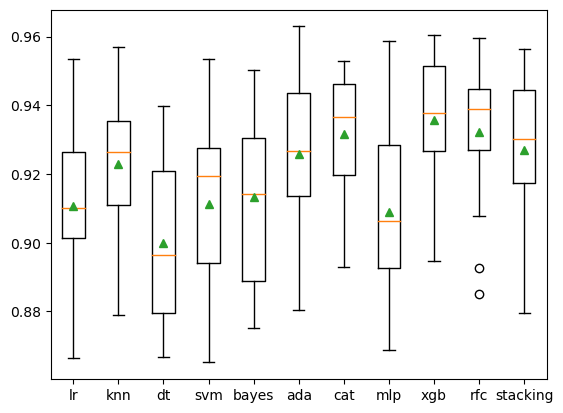

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

In [184]:
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, features, target)
 results.append(scores)
 names.append(name)
 print(' ROC_AUC [%s]: %.3f +/- %.3f' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [31]:
clf1 = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 15, weights = 'distance')
clf2 = RandomForestClassifier(n_estimators = 150, max_features = 'auto', max_depth = 6, criterion = 'entropy')
clf3 = GaussianNB(var_smoothing = 0.0015199110829529332)
clf4 = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10,random_state=42)
clf5 = LGBMClassifier(lambda_l1=1.5, lambda_l2=1, min_data_in_leaf=50, num_leaves=5,reg_alpha=0.1)
clf6 = AdaBoostClassifier(n_estimators = 300, learning_rate = 0.03, algorithm = 'SAMME.R')
clf7 = CatBoostClassifier(n_estimators = 300, depth = 6, l2_leaf_reg = 1, learning_rate = 0.03, verbose = False)
clf8 = MLPClassifier(activation = 'relu', alpha = 0.0001, early_stopping = False,
                                     hidden_layer_sizes = (50, 30, 20, 30, 10),
                                     learning_rate_init = 0.0001,
                                     max_iter = 300,
                                     solver = 'adam')
clf9 = XGBClassifier(n_estimators = 250, subsample = 0.8, min_child_weight = 1, max_depth = 3, gamma = 1.5, learning_rate = 0.02)
clf10 = LogisticRegression(C=0.08858667904100823, max_iter=7,solver='sag')

meta_model = GaussianNB()

sclf = StackingCVClassifier(classifiers=[clf1,clf2,clf3,clf4,clf5,clf6,clf7,clf8,clf9,clf10], 
                            meta_classifier= meta_model,
                            use_probas=True,
                            random_state=42)

In [35]:
stack_params = {
        'meta_classifier__var_smoothing': np.logspace(0,-9, num=5)
        #'meta_classifier__min_child_weight': [1, 5, 10],
        #'meta_classifier__gamma': [0.5, 1, 1.5, 2],
        #'meta_classifier__max_depth': [3, 4, 5]
        }

In [36]:
gs_stack = GridSearchCV(estimator= sclf, 
                     param_grid=stack_params, 
                     cv=5,
                     verbose=1,
                     refit = True,
                     scoring='roc_auc')

In [37]:
gs_stack.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be i

GridSearchCV(cv=5,
             estimator=StackingCVClassifier(classifiers=[KNeighborsClassifier(metric='manhattan',
                                                                              n_neighbors=15,
                                                                              weights='distance'),
                                                         RandomForestClassifier(criterion='entropy',
                                                                                max_depth=6,
                                                                                n_estimators=150),
                                                         GaussianNB(var_smoothing=0.0015199110829529332),
                                                         DecisionTreeClassifier(criterion='entropy',
                                                                                max_depth=5,
                                                                                min_samples_leaf=

In [41]:
gs_stack.best_score_

nan

In [39]:
cv_keys = ('mean_test_score', 'std_test_score', 'params')

for r, _ in enumerate(gs_stack.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (gs_stack.cv_results_[cv_keys[0]][r],
             gs_stack.cv_results_[cv_keys[1]][r] / 2.0,
             gs_stack.cv_results_[cv_keys[2]][r]))

print('Best parameters: %s' % gs_stack.best_params_)
print('ROC_AUC: %.2f' % gs_stack.best_score_)

nan +/- nan {'meta_classifier__var_smoothing': 1.0}
nan +/- nan {'meta_classifier__var_smoothing': 0.005623413251903491}
nan +/- nan {'meta_classifier__var_smoothing': 3.1622776601683795e-05}
nan +/- nan {'meta_classifier__var_smoothing': 1.7782794100389227e-07}
nan +/- nan {'meta_classifier__var_smoothing': 1e-09}
Best parameters: {'meta_classifier__var_smoothing': 1.0}
ROC_AUC: nan
